In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
!ln -s ~/fastai/fastai fastai

ln: fastai/fastai: File exists


In [3]:
from fastai.vision import *
from fastai.metrics import error_rate
from PIL import Image

In [4]:
data = ImageDataBunch.from_folder("./data1", 
                                  train=".", 
                                  valid_pct=0.2, 
                                  bs=5,
                                  ds_tfms=get_transforms(), 
                                  size=224, 
                                  num_workers=4).normalize(imagenet_stats)

In [5]:
data.classes

['over', 'under', 'zero']

In [6]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['over', 'under', 'zero'], 3, 48, 12)

In [7]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [8]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.271670,1.192049,0.666667,00:20
1,0.999407,1.227380,0.416667,00:21
2,0.910074,1.317974,0.416667,00:20
3,0.791231,1.302199,0.416667,00:20


In [9]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


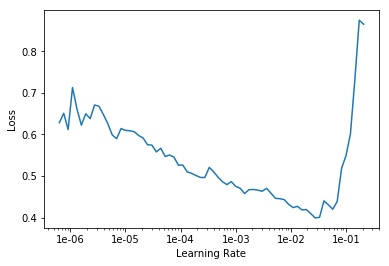

In [10]:
learn.recorder.plot()

In [11]:
learn.fit_one_cycle(2, max_lr=slice(3e-5,3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.748902,1.294066,0.416667,00:19
1,0.664710,1.301093,0.416667,00:18


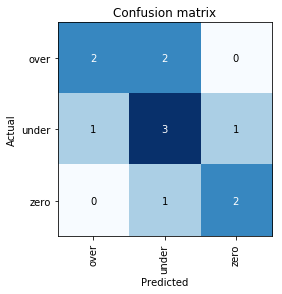

In [12]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [13]:
learn.export()

In [17]:
defaults.device = torch.device('cpu')

In [ ]:
learn = load_learner(path)
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

In [ ]:
# Starlette framework

@app.route("/classify-url", methods=["GET"])
async def classify_url(request):
    bytes = await get_bytes(request.query_params["url"])
    img = open_image(BytesIO(bytes))
    _,_,losses = learner.predict(img)
    return JSONResponse({
        "predictions": sorted(
            zip(cat_learner.data.classes, map(float, losses)),
            key=lambda p: p[1],
            reverse=True
        )
    })